In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import random
import seaborn as sns

# Quirky Data Science, Probability, and Statistics
*By [Daniel Lee](https://github.com/dleestat)*

## A Knights Problem

### Question
If a knight starts in the corner of a chessboard and on each step moves at random, how long on average does it take to return to its starting position?

<img src='img/knight.jpeg' style='width: 200px'/>

### Solution
For this problem, we use a result derived from graph theory and stochastic processes.

---
**Random walk on a graph:**

Let $G=(V,E)$ be a finite, undirected, connected graph. For each vertex $v \in V$, let $d(v)$ be the degree of $v$. For all $u$, $v \in V$, write $u \sim v$ if $u$ and $v$ are adjacent. For all $u$, $v \in V$, let

$$p(v,w) = \begin{cases}\frac{1}{d(v)}~\text{if}~w \sim v \\ 0~\text{otherwise.}\end{cases}$$

The discrete time Markov chain with state space $V$ and transition probabilities $p(v,w)$ is called the random walk on $G$. For example, if $p(5,2)=\frac{1}{3}$, if we are currently at vertex $5$, there is a $\frac{1}{3}$ probability we willl visit vertex $2$ next.

Note that the random walk is irreducible because the graph is connected. Since the random walk is irreducible and has a finite state space, the random walk has a unique stationary distribution. Here, the unique stationary distribution of the random walk is a probability distribution over $V$ that remains unchanged as time progresses.

Let $d=\sum_{w \in V} d(w)$ be the sum of the degrees of the vertices in $V$. For all $v \in V$, let $\pi(v)=\frac{d(v)}{d}$, so

$$\sum_{w \in V} \pi(w)p(w,v)
= \sum_{w \in V} \frac{d(w)}{d}p(w,v)
= \sum_{w: w \sim v} \frac{d(w)}{d} \cdot \frac{1}{d(w)}
= \sum_{w: w \sim v} \frac{1}{d}
= \frac{d(v)}{d}
= \pi(v),$$

so $\pi$ is a stationary distribution for the random walk on $G$. As a result, $\pi(v)=\frac{d(v)}{d}$ is the long run fraction of time that the random walk spends at vertex $v$.

---
Here, the knight's movement across the board is a random walk on the graph whose vertices are the 64 squares such that $v \sim w$ if a knight can move from square $v$ to square $w$. So $d(v)$ is the number of squares to which a knight can move from square $v$ and $\pi(v)=\frac{d(v)}{d}$ is the long run fraction of time that the knight spends at square $v$.

The plot below visualizes the number of squares to which a knight can move from each square of the chessboard.

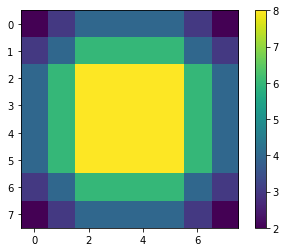

In [2]:
degrees = np.array([
    [2,3,4,4,4,4,3,2],
    [3,4,6,6,6,6,4,3],
    [4,6,8,8,8,8,6,4],
    [4,6,8,8,8,8,6,4],
    [4,6,8,8,8,8,6,4],
    [4,6,8,8,8,8,6,4],
    [3,4,6,6,6,6,4,3],
    [2,3,4,4,4,4,3,2],
])
plt.imshow(degrees)
plt.colorbar();

In [3]:
np.sum(degrees)

336

Here, $d=336$. If $x$ is a corner square, $d(x)=2$, so $\pi(x)=\frac{d(x)}{d}=\frac{2}{336}=\frac{1}{168}$ is the long run fraction of time that the knight spends at square $x$. Therefore, the random walk's expected return time to $x$ is $\frac{1}{\pi(x)}=168$ moves, so it takes 168 moves on average for the knight to return to its starting position.

We now run a simulation to verify our solution.

In [4]:
MOVES = [(1,2),(2,1),(2,-1),(1,-2),(-1,-2),(-2,-1),(-2,1),(-1,2)]

def random_walk():
    x, y = x0, y0 = 0, 0
    count = 0
    while True:
        x, y = move(x, y)
        count += 1
        if x == x0 and y == y0:
            return count
        
def move(x, y):
    while True:
        dx, dy = MOVES[random.randint(0, len(MOVES)-1)]
        newx, newy = x + dx, y + dy
        if 0 <= newx < 8 and 0 <= newy < 8:
            return newx, newy

171.1844

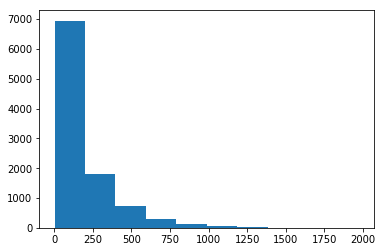

In [5]:
random.seed(0)
n_moves = [random_walk() for _ in range(10000)]
plt.hist(n_moves)
np.mean(n_moves)

Upon 10,000 random walk simulations, we see that the average number of moves for the knight to return to its starting position is close to 168 as expected.

## Betting on a Favorable Game

### Question
We start with \\$1. Each time we bet, we win the amount of our bet with probability .51 and lose the amount of our bet with probability .49. (Note that this is a favorable game since the win probability is greater than the loss probability.) Consider the strategy of betting some fraction $r$ of our holdings every time. How can we choose $r$ to make money the fastest?

### Answer
For this problem, we use the *strong law of large numbers* from probability theory.

---
**Strong law of large numbers (SLLN):**

Let $X_1, \ldots, X_n$ be i.i.id. with finite mean $\mu$. Then

$$P\left(\lim_{n \to \infty} \bar{X_n} = \mu \right) = 1$$

---
Let $X_n$ be the amount of money we have after $n$ bets. Let
$$V_n = \begin{cases}1 + r~\text{if we win the}~n^{\text{th}}~\text{bet} \\ 1-r~\text{if we lose the}~n^{\text{th}}~\text{bet.}\end{cases}$$

Then $X_0 = 1$ and $X_n = V_n X_{n-1}$ for $n \geq 1$ by the definition of the game. Thus,

$$\begin{align}
    X_n = \prod_{i=1}^n V_i
    &\implies \log X_n = \sum_{i=1}^n \log V_i = \sum_{i=1}^n W_i~\text{where}~W_i = \log V_i\\
    &\implies \lim_{n \to \infty} \frac{1}{n} \log X_n = \mathbb{E}[W_i]~\text{by the SLLN}\\
    &\implies X_n \approx e^{n\mathbb{E}[W_i]}~\text{for large n},
\end{align}$$

so we want to choose $r$ to maximize $\mathbb{E}[W_i]$. Now,

$$\mathbb{E}[W_i] = .51\log(1+r) + .49\log(1-r).$$

$$\frac{d}{dr} \mathbb{E}[W_i] = \frac{.51}{1+r} - \frac{.49}{1-r} \equiv 0 \implies .51(1-r) = .49(1+r) \implies r=.02.$$

$$\frac{d^2}{dr^2} \mathbb{E}[W_i] = -\frac{.51}{(1+r)^2} - \frac{.49}{(1-r)^2} < 0.$$

So $r = \underset{r}{\text{argmax}}~X_n = \underset{r}{\text{argmax}}~\mathbb{E}[W_i] = .02$ is the best choice of $r$ to make money the fastest.

## The St. Petersburg Paradox

### Question
A casino offers a game where a fair coin is tossed until tails appears. The stake starts at \\$2 and is doubled every time heads appears. As soon as tails appears, the game ends and the player wins the pot, i.e., if the first tails comes on the nth toss, the player wins \\$$2^n$. What would be a fair price to enter the game?

### Solution
Let $X$ be the payout in dollars.
$$E[X] = \sum_{n=1}^{\infty} 2^n P(x=2^n) = \sum_{n=1}^{\infty} 2^n \cdot \frac{1}{2^n} = \sum_{n=1}^{\infty} 1 = \infty,$$
so the expected payout is an infinite amount of money assuming the casino has unlimited money (an unrealistic assumption in practice). Therefore, any price would be a fair price to enter the game, since the expected payout is infinitely large.

Note that the payout has a distribution of $2^N$, where $N \sim {\rm Geometric}(\frac{1}{2})$. Using this fact, we now run a simulation to verify our solution.

count   10000000.00
mean          24.37
std         5195.21
min            2.00
25%            2.00
50%            4.00
75%            8.00
max      8388608.00
dtype: float64

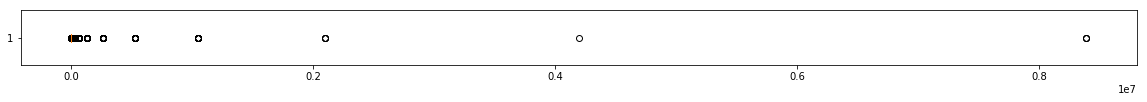

In [6]:
plt.figure(figsize=[20,1])
np.random.seed(0)
payouts = pd.Series(2**np.random.geometric(.5, 10000000))
plt.boxplot(payouts, vert=False)
payouts.describe()

Upon 10 million simulations of payouts, we see that the data is plagued with extremely large outliers, consistent with the fact that the theoretical expected payout is infinitely large.

## The Cauchy Distribution

Mathematics is full of strange edge cases (referred to as *pathological* phenomena) which appear to defy our initial (naive) intuition and beliefs. In mathematics, a pathological phenomenon is one whose properties are considered atypically bad or counterintuitive.

For example, although one may initially believe that any continuous function must be differentiable at at least one point, there actually exists continuous functions that are nowhere differentiable. That is, continuity does not imply differentiability. An example is Brownian motion, a famous, continuous time stochastic process that is a continuous function of time but is nowhere differentiable. Intuitively, Brownian motion is nowhere differentiable because a very small change in time results in a very large change in position, to the point that a derivative does not exist. Visually, Brownian motion is nowhere differentiable because it possesses a fractral property; Brownian motion has the same, jagged appearance regardless of how much you "zoom" in as seen below.

<img src='img/BrownianMotion.gif' style='width: 500px'/>

The Weierstrass function is another, classic example of a continuous, nowhere differentiable function that also possesses a fractral property as seen below.

<img src='img/WeierstrassFunction.gif' style='width: 300px'/>

The Cauchy distribution is a famous pathalogical phenomena in probability theory. The Cauchy distribution is a symmetric probability distribution whose mean and variance are undefined (!). The fact that the mean of the Cauchy distribution is undefined is especially surprising, since one would expect the mean to lie the distribution's axis of symmetry. However, this is false; only the median and mode lie along the axis of symmetry. How can we empirically test whether or not the Cauchy distribution truly has an undefined mean? Here, we use the *law of large of numbers* from probability theory, a theorem that describes the result of performing the same experiment a large number of times.

---
**Law of large numbers (LLN):**

The average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

---
We now generate large, random samples from the standard Normal, standard Exponential, and standard Cauchy distributions to see whether the (cumulative) sample means converge. We generate 4 samples of size 100,000 from each distribution.

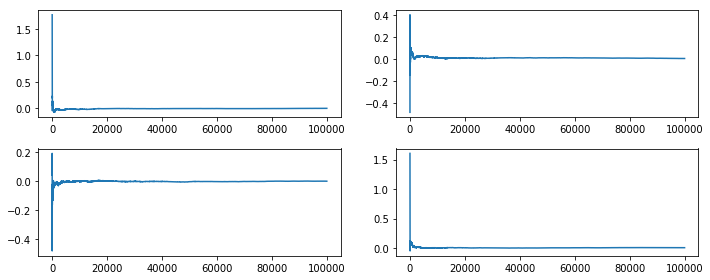

In [7]:
# Standard Normal distribution
fig, axes = plt.subplots(2, 2, figsize=[10,4])
np.random.seed(0)
for ax in axes.flatten():
    sample = np.random.standard_normal(100000)
    ax.plot(np.cumsum(sample) / np.arange(1, len(sample)+1))
plt.tight_layout()

For the standard Normal distribution, we observe the law of large numbers. The cumulative sample mean approaches 0, the expected value, as the sample size increases.

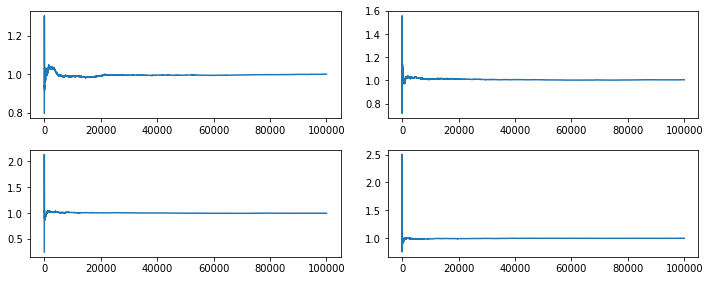

In [8]:
# Standard Exponential distribution
fig, axes = plt.subplots(2, 2, figsize=[10,4])
np.random.seed(0)
for ax in axes.flatten():
    sample = np.random.standard_exponential(100000)
    ax.plot(np.cumsum(sample) / np.arange(1, len(sample)+1))
plt.tight_layout()

Likewise, for the standard Normal distribution, we observe the law of large numbers. The cumulative sample mean approaches 1, the expected value, as the sample size increases.

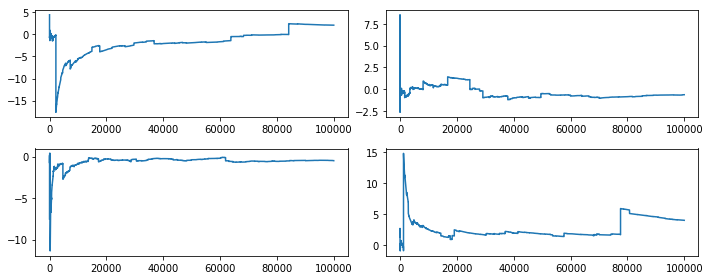

In [9]:
# Standard Cauchy distribution
fig, axes = plt.subplots(2, 2, figsize=[10,4])
np.random.seed(0)
for ax in axes.flatten():
    sample = np.random.standard_cauchy(100000)
    ax.plot(np.cumsum(sample) / np.arange(1, len(sample)+1))
plt.tight_layout()

However, we observe something different for the standard Cauchy distribution. At times it appears that the cumulative mean approaches 0 but eventually the cumulative mean jumps away from 0 due to a new, extremely large outlier. Note that the law of large numbers does not apply here since the expected value of the (standard) Cauchy distribution is undefined.

In fact, if $X_1, \ldots, X_n$ are i.i.d. ${\rm Cauchy}(x_0, \gamma)$, the sample mean $\bar{X}$ itself is also ${\rm Cauchy}(x_0, \gamma)$ for any $n$. As a result, $\bar{X}$ will never converge to a constant, consistent with the fact that the expected value of the Cauchy distribution is undefined.

### References
- https://brilliant.org/wiki/stationary-distributions/
- https://en.wikipedia.org/wiki/Cauchy_distribution
- https://en.wikipedia.org/wiki/Pathological_(mathematics)
- http://web.mit.edu/8.334/www/grades/projects/projects17/OscarMickelin/fractals.html
- https://www.chess.com/analysis
- https://www.johndcook.com/blog/2012/05/10/solutions-to-knights-random-walk/
- https://www.reddit.com/r/math/comments/2nltot/a_weierstrass_function_continuous_everywhere/
- Schweinsberg, Jason. MATH 180A, Fall 2017, UC San Diego, La Jolla, CA. Lecture.
- Schweinsberg, Jason. MATH 180B, Winter 2018, UC San Diego, La Jolla, CA. Lecture.